In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
import utils

In [2]:
# read MNIST training data
df = pd.read_csv('data/mnist_train.csv')
X = df.iloc[:, 1:].to_numpy() / 255.0       # values are scaled to be between 0 and 1
y = df.iloc[:, 0].to_numpy()  

This code is mostly re-used from my implementation to Q1. For specific documentation there are more comments explaining the process in Q1. The answers to the questions for Q2 are at the bottom.

In [5]:

A=X.T
#In this step we will de-mean the matrix
meanValue = np.mean(A,axis=1).reshape(A.shape[0],1)
A = A - meanValue
print(A.shape)

(784, 60000)


We graph the singular values obtained on a semilogy plot and it shows how our values decrease in an ordered fashion

In [7]:
#SVD Decomposition
U,S,V = np.linalg.svd(A,full_matrices=False)
print(U.shape)
print(V.shape)
print(S)

(784, 784)
(784, 60000)
[5.54082362e+02 4.73792896e+02 4.41768327e+02 4.12909676e+02
 3.92459549e+02 3.69347437e+02 3.21725930e+02 3.02046509e+02
 2.95595769e+02 2.73063660e+02 2.58310392e+02 2.52977007e+02
 2.32980568e+02 2.31365471e+02 2.23473378e+02 2.16594639e+02
 2.04701035e+02 2.00984267e+02 1.93801673e+02 1.90958565e+02
 1.83652364e+02 1.78458396e+02 1.73684520e+02 1.69906859e+02
 1.67172146e+02 1.62947473e+02 1.60330745e+02 1.57723517e+02
 1.53491523e+02 1.47835528e+02 1.44287250e+02 1.43192778e+02
 1.38071501e+02 1.36222392e+02 1.34285671e+02 1.31139910e+02
 1.26493336e+02 1.24231306e+02 1.23409997e+02 1.22229928e+02
 1.20204819e+02 1.18627133e+02 1.15062150e+02 1.12238811e+02
 1.10357056e+02 1.08933024e+02 1.07014755e+02 1.05463726e+02
 1.03719567e+02 1.00908402e+02 1.00459500e+02 9.94765847e+01
 9.67647560e+01 9.56090211e+01 9.48075482e+01 9.26654071e+01
 9.23380578e+01 9.04255743e+01 8.95993200e+01 8.79980163e+01
 8.72262382e+01 8.70004999e+01 8.53755086e+01 8.37148356e+01


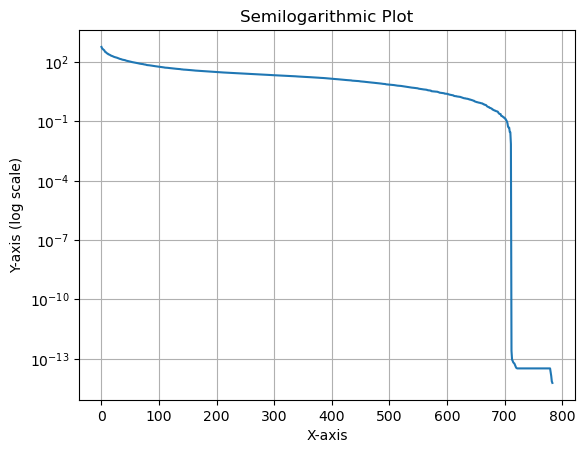

In [8]:
#y = np.log(S)
plt.semilogy(S)

# Add labels and a title
plt.xlabel('X-axis')
plt.ylabel('Y-axis (log scale)')
plt.title('Semilogarithmic Plot')

# Show the plot
plt.grid(True)  # Add a grid for better visualization
plt.show()

Here we display the eigen-Digits derived from the SVD Decomposition

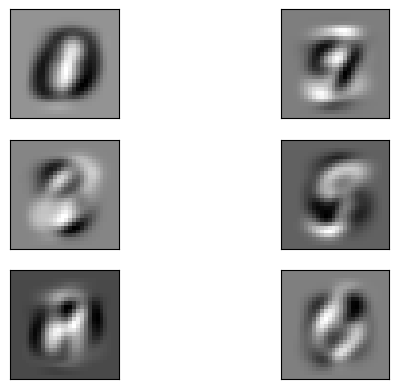

In [12]:
# plot the first dozen images from the data set
plt.figure()
for i in range(6):
    plt.subplot(3, 2, i+1, xticks=[], yticks=[])
    image = U[:, i].reshape((28,28))
    plt.imshow(image, cmap='gray')

In [13]:
def truncate(k,U,S,V): #returns truncated svd matrices
    return U[:,:k],S[:k],V[:k,:]

In [14]:
print(U.shape,":",S.shape,":",V.shape)
Uk,Sk,Vk = truncate(50,U,S,V)
print(Uk.shape,":",Sk.shape,":",Vk.shape) # display truncated

(784, 784) : (784,) : (784, 60000)
(784, 50) : (50,) : (50, 60000)


In [15]:
Ak=Uk@np.diag(Sk)@Vk
difference = (A-Ak)**2
RMS = np.sqrt((np.sum(difference))/(A.shape[0]*A.shape[1]))
print(RMS)

0.10859433707402291


Q1)assess the visual quality of the reconstruction

Here we show the the data compared to its reconstruction. As you can see it does a good job at reconstructing our base image although it is more blurry and less defined. 

Considering that we reduced the dimensionality to 50 and still have something that resembles the original digit, i'd say this reconstruction is impressive

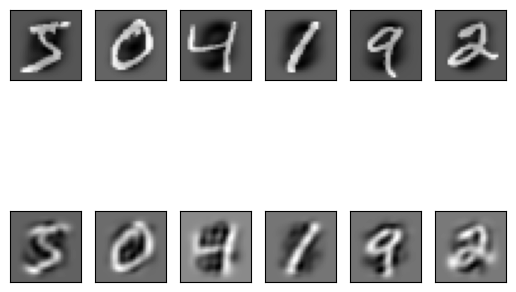

In [16]:
for i in range(6):
    plt.subplot(2, 6, i+1, xticks=[], yticks=[])
    image = A[:, i].reshape((28,28))
    plt.imshow(image, cmap='gray')
    
for i in range(6):
    plt.subplot(2, 6, 7+i, xticks=[], yticks=[])
    image = Ak[:, i].reshape((28,28))
    plt.imshow(image, cmap='gray')

Q2) what quantitative metric could you use to assess the quality of the latent representation?

We want to create an equation to measure the sum difference from our original dataset to our reconstructed data set, averaged across all the samples. This equation takes the form of:

$$J(W,Z) = \frac{1}{N}\lVert X^T-WZ^T \rVert^2_{F}$$
Q3) what does the SVD guarantee about the sum of all these errors for the whole dataset?

The SVD guarantees we can find the minimum possible values for $W$ and $Z^T$ to minimize this equation. Using the matrices obtained from SVD our assignment is simply:

$$W=U$$
$$Z^T=\Sigma V^T$$


Q4) suppose we wanted to build a classifier for the MNIST data. Based on your observations above, is it
possible to use the latent space representation as input to the classifier? (i.e., would you expect the
confusion matrix to be similar to the one you generated in the last assignment?). Answer briefly.

I do believe that the latent space representation can be used as input the classifier. The reason I believe this is because even though we reduced the dimensionality, the information relevant to the digits was still preserved. These images are still different enough from each other that distinguishing between them seems feasible. Each digit still has defining features so i expect the confusion matrix to be similar.

This just seems like a more systemic way to reduce dimensionality then the adhoc method we used in Assignment 2


